# Sprint ゲート付きリカレントニューラルネットワーク
### Sprintの目的
* 発展的なRNNの手法を理解する
* ドキュメントを網羅的に読む


### どのように学ぶか
Kerasに用意されているRNN関係のレイヤーを動作させながら学んでいきます。

# １．KerasのRecurrentレイヤー
Kerasには複数のRecurrentレイヤーや、それに関連したクラスが用意されています。今回のSprintではこれら全てを動かした上で、それぞれの役割を説明できる状態を目指します。

以下のドキュメントにまとめられています。

Recurrentレイヤー - Keras Documentation：https://keras.io/ja/layers/recurrent/

# 【問題1】各種手法の実行
Kerasには4種類のReccurentレイヤーが用意されています。SimpleRNN以外はゲート付きリカレントニューラルネットワークです。

* SimpleRNN
* GRU
* LSTM
* ConvLSTM2D   

これらを実行してください。                  
この中でSimpleRNN、GRU、LSTMは同様のタスクに用いることができるため、精度の比較も行なってください。

Keras公式のサンプルコードを利用してください。

LSTMのサンプルコード：https://github.com/keras-team/keras/blob/master/examples/imdb_lstm.py              
ConvLSTM2Dのサンプルコード：https://github.com/keras-team/keras/blob/master/examples/conv_lstm.py      

このサンプルコードをそのまま使う必要はなく、ノード数やエポックなどは変更して構いません。全て実行する上での実行時間を考慮した数に設定してください。

In [0]:
from __future__ import print_function

from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM,SimpleRNN,GRU
from keras.datasets import imdb

Using TensorFlow backend.


In [0]:
import numpy as np

In [0]:
max_features = 20000
maxlen = 80
batch_size = 32

print('Loading data...')
(x_train_L, y_train_L), (x_test_L, y_test_L) = imdb.load_data(num_words=max_features)
print(len(x_train_L), 'train sequences')
print(len(x_test_L), 'test sequences')

Loading data...
25000 train sequences
25000 test sequences


In [0]:
x_train_L

array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 19193, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 12118, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
       list([1, 194, 1153, 194, 82

In [0]:
np.unique(y_train_L,return_index=True)

(array([0, 1]), array([1, 0]))

In [0]:
y_test_L.shape

(25000,)

In [0]:
# 今回は学習データをランダムに50％まで減らす
from sklearn.model_selection import train_test_split
x_train, _x, y_train, _y = train_test_split(x_train_L, y_train_L, test_size=0.5, random_state=42)
x_test, _X, y_test, _Y = train_test_split(x_test_L, y_test_L, test_size=0.5, random_state=42)
x_train.shape

(12500,)

### （１）SimpleRNN
* Embedding・・・Word2vecみたいに，文字を数字の羅列に変換

In [0]:
# SimpleRNN
print('Pad sequences (samples x time)')
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)#シーケンスを同じ長さになるように詰めます．
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

print('Build model...')
model = Sequential()
model.add(Embedding(max_features, 128))#固定長の分散表現に変換
model.add(SimpleRNN(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))#全結合

# 異なるオプティマイザーと異なるオプティマイザー設定を使用してみてください
model.compile(loss='binary_crossentropy',#2値分類のloss
              optimizer='adam',
              metrics=['accuracy'])

print('Train...')
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=15,
          validation_data=(x_test, y_test))
score, acc = model.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

Pad sequences (samples x time)
x_train shape: (12500, 80)
x_test shape: (12500, 80)
Build model...
Train...
Train on 12500 samples, validate on 12500 samples
Epoch 1/15
12500/12500 [==============================] - 26s 2ms/step - loss: 0.7012 - acc: 0.5118 - val_loss: 0.6837 - val_acc: 0.5336
Epoch 2/15
12500/12500 [==============================] - 24s 2ms/step - loss: 0.6583 - acc: 0.5982 - val_loss: 0.6681 - val_acc: 0.5719
Epoch 3/15
12500/12500 [==============================] - 23s 2ms/step - loss: 0.5882 - acc: 0.6854 - val_loss: 0.6537 - val_acc: 0.6022
Epoch 4/15
12500/12500 [==============================] - 24s 2ms/step - loss: 0.4959 - acc: 0.7516 - val_loss: 0.5910 - val_acc: 0.7130
Epoch 5/15
12500/12500 [==============================] - 23s 2ms/step - loss: 0.4194 - acc: 0.8050 - val_loss: 0.6387 - val_acc: 0.6897
Epoch 6/15
12500/12500 [==============================] - 23s 2ms/step - loss: 0.3969 - acc: 0.8186 - val_loss: 0.6700 - val_acc: 0.6159
Epoch 7/15
12500/125

### （２）GRU

In [0]:
# GRU
print('Pad sequences (samples x time)')
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)#シーケンスを同じ長さになるように詰める（今回の1シーケンスは１レビュー．それを全レビューの中で最も単語数が多いシーケンスの長さに合わせる＝単語数をそろえる）
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

print('Build model...')
model = Sequential()
model.add(Embedding(max_features, 128))#正の整数（インデックス）を固定次元の密ベクトルに変換
model.add(GRU(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))#全結合

# 異なるオプティマイザーと異なるオプティマイザー設定を使用してみてください
model.compile(loss='binary_crossentropy',#2値分類のloss
              optimizer='adam',
              metrics=['accuracy'])

print('Train...')
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=15,
          validation_data=(x_test, y_test))
score, acc = model.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

Pad sequences (samples x time)
x_train shape: (12500, 80)
x_test shape: (12500, 80)
Build model...
Train...
Train on 12500 samples, validate on 12500 samples
Epoch 1/15
12500/12500 [==============================] - 68s 5ms/step - loss: 0.5335 - acc: 0.7202 - val_loss: 0.4332 - val_acc: 0.8006
Epoch 2/15
12500/12500 [==============================] - 65s 5ms/step - loss: 0.3155 - acc: 0.8720 - val_loss: 0.4181 - val_acc: 0.8143
Epoch 3/15
12500/12500 [==============================] - 65s 5ms/step - loss: 0.1962 - acc: 0.9246 - val_loss: 0.4700 - val_acc: 0.8028
Epoch 4/15
12500/12500 [==============================] - 63s 5ms/step - loss: 0.1023 - acc: 0.9643 - val_loss: 0.6465 - val_acc: 0.7994
Epoch 5/15
12500/12500 [==============================] - 65s 5ms/step - loss: 0.0566 - acc: 0.9793 - val_loss: 0.7203 - val_acc: 0.7944
Epoch 6/15
12500/12500 [==============================] - 64s 5ms/step - loss: 0.0327 - acc: 0.9894 - val_loss: 0.9165 - val_acc: 0.7872
Epoch 7/15
12500/125

### （３）LSTM

In [0]:
# LSTM
print('Pad sequences (samples x time)')
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

print('Build model...')
model = Sequential()
model.add(Embedding(max_features, 128))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

# try using different optimizers and different optimizer configs
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print('Train...')
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=15,
          validation_data=(x_test, y_test))
score, acc = model.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

Pad sequences (samples x time)
x_train shape: (12500, 80)
x_test shape: (12500, 80)
Build model...




Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train...
Train on 12500 samples, validate on 12500 samples
Epoch 1/15
12500/12500 [==============================] - 81s 7ms/step - loss: 0.5118 - acc: 0.7474 - val_loss: 0.4512 - val_acc: 0.8067
Epoch 2/15
12500/12500 [==============================] - 81s 6ms/step - loss: 0.3323 - acc: 0.8609 - val_loss: 0.4410 - val_acc: 0.8030
Epoch 3/15
12500/12500 [==============================] - 81s 6ms/step - loss: 0.2263 - acc: 0.9107 - val_loss: 0.4826 - val_acc: 0.7996
Epoch 4/15
12500/12500 [==============================] - 81s 6ms/step - loss: 0.1485 - acc: 0.9441 - val_loss: 0.6074 - val_acc: 0.8041
Epoch 5/15
12500/12500 [==============================] - 81s 7ms/step - loss: 

simpleRNNより，GRUとLSTMの精度が良かった．

### （４）ConvLSTM2D

Train on 950 samples, validate on 50 samples
Epoch 1/50
950/950 [==============================] - 125s 132ms/step - loss: 0.2526 - val_loss: 0.0754
Epoch 2/50
950/950 [==============================] - 117s 124ms/step - loss: 0.0174 - val_loss: 0.0106
Epoch 3/50
950/950 [==============================] - 117s 124ms/step - loss: 0.0031 - val_loss: 0.0025
Epoch 4/50
950/950 [==============================] - 117s 123ms/step - loss: 0.0011 - val_loss: 9.6934e-04
Epoch 5/50
950/950 [==============================] - 117s 123ms/step - loss: 7.4073e-04 - val_loss: 7.6695e-04
Epoch 6/50
950/950 [==============================] - 117s 123ms/step - loss: 5.7603e-04 - val_loss: 4.8405e-04
Epoch 7/50
950/950 [==============================] - 118s 124ms/step - loss: 4.7579e-04 - val_loss: 4.9848e-04
Epoch 8/50
950/950 [==============================] - 118s 124ms/step - loss: 4.2107e-04 - val_loss: 3.6690e-04
Epoch 9/50
950/950 [==============================] - 117s 123ms/step - loss: 3.6692e-0

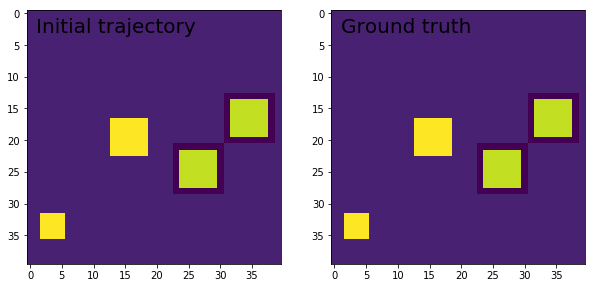

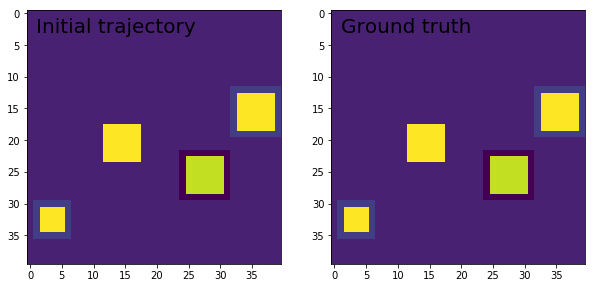

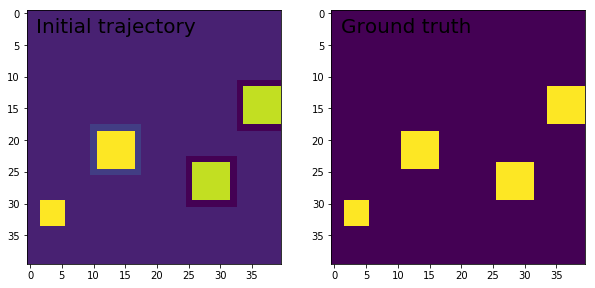

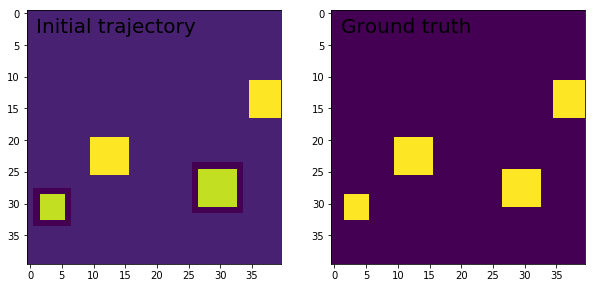

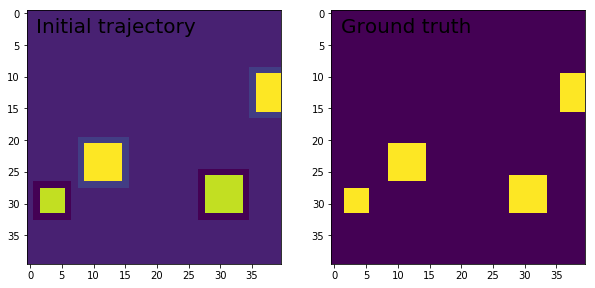

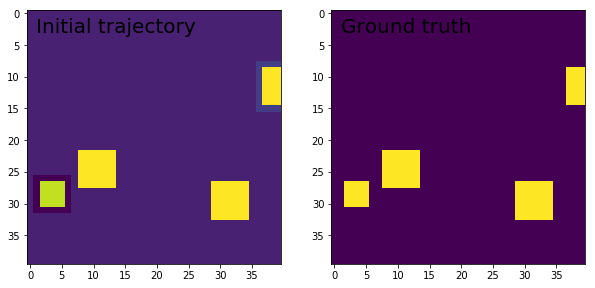

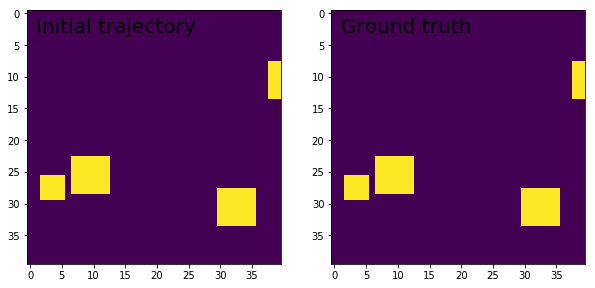

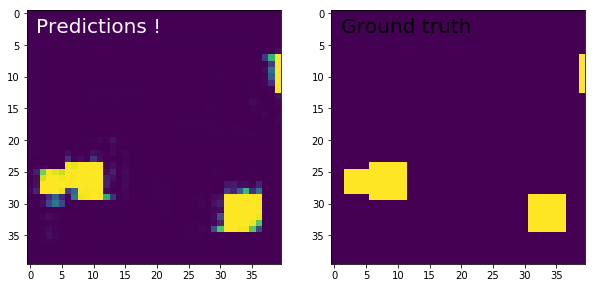

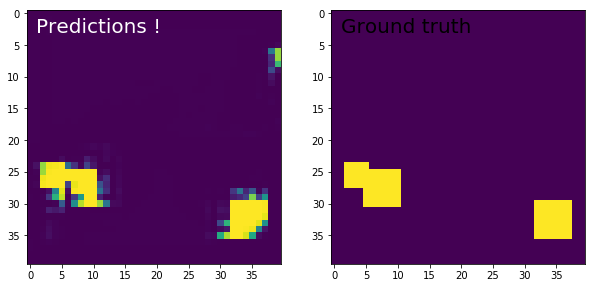

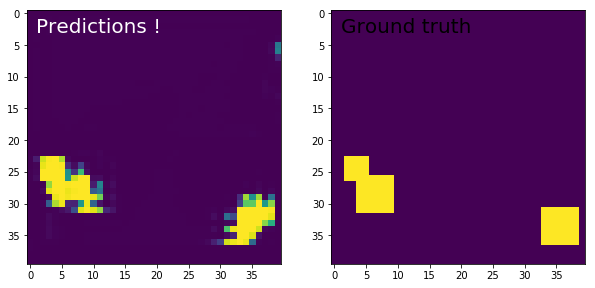

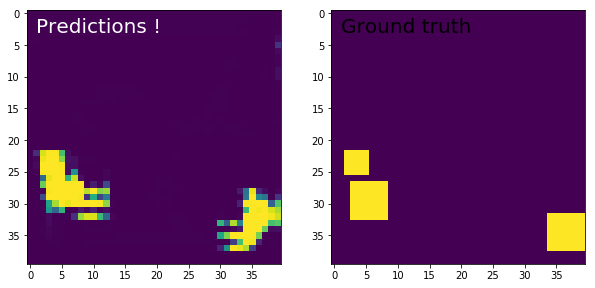

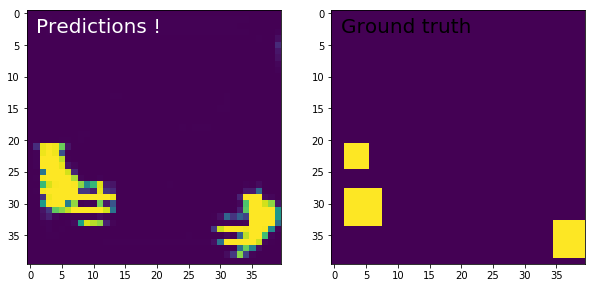

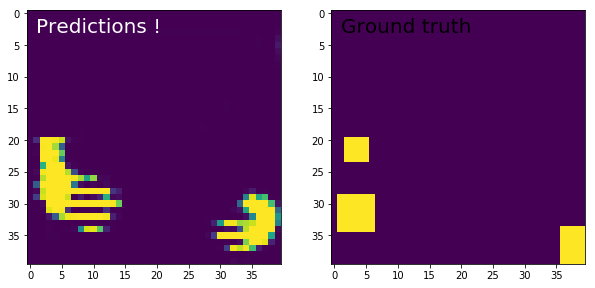

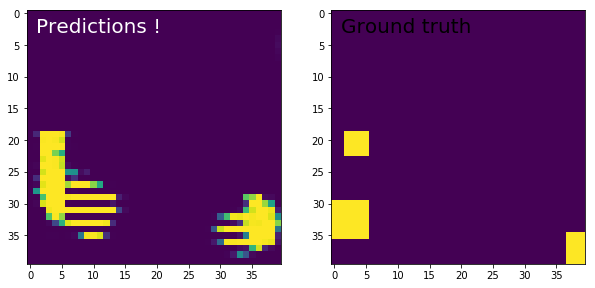

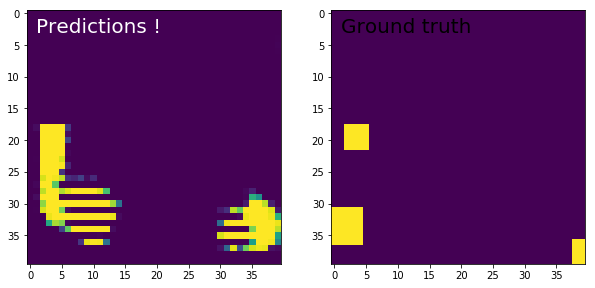

In [0]:
"""
#This script demonstrates the use of a convolutional LSTM network.
This network is used to predict the next frame of an artificially
generated movie which contains moving squares.
"""
from keras.models import Sequential
from keras.layers.convolutional import Conv3D
from keras.layers.convolutional_recurrent import ConvLSTM2D
from keras.layers.normalization import BatchNormalization
import numpy as np
import pylab as plt

# We create a layer which take as input movies of shape
# (n_frames, width, height, channels) and returns a movie
# of identical shape.

seq = Sequential()
seq.add(ConvLSTM2D(filters=40, kernel_size=(3, 3),
                   input_shape=(None, 40, 40, 1),
                   padding='same', return_sequences=True))
seq.add(BatchNormalization())

seq.add(ConvLSTM2D(filters=40, kernel_size=(3, 3),
                   padding='same', return_sequences=True))
seq.add(BatchNormalization())

seq.add(ConvLSTM2D(filters=40, kernel_size=(3, 3),
                   padding='same', return_sequences=True))
seq.add(BatchNormalization())

seq.add(ConvLSTM2D(filters=40, kernel_size=(3, 3),
                   padding='same', return_sequences=True))
seq.add(BatchNormalization())

seq.add(Conv3D(filters=1, kernel_size=(3, 3, 3),
               activation='sigmoid',
               padding='same', data_format='channels_last'))
seq.compile(loss='binary_crossentropy', optimizer='adadelta')


# Artificial data generation:
# Generate movies with 3 to 7 moving squares inside.
# The squares are of shape 1x1 or 2x2 pixels,
# which move linearly over time.
# For convenience we first create movies with bigger width and height (80x80)
# and at the end we select a 40x40 window.

def generate_movies(n_samples=1200, n_frames=15):
    row = 80
    col = 80
    noisy_movies = np.zeros((n_samples, n_frames, row, col, 1), dtype=np.float)
    shifted_movies = np.zeros((n_samples, n_frames, row, col, 1),
                              dtype=np.float)

    for i in range(n_samples):
        # Add 3 to 7 moving squares
        n = np.random.randint(3, 8)

        for j in range(n):
            # Initial position
            xstart = np.random.randint(20, 60)
            ystart = np.random.randint(20, 60)
            # Direction of motion
            directionx = np.random.randint(0, 3) - 1
            directiony = np.random.randint(0, 3) - 1

            # Size of the square
            w = np.random.randint(2, 4)

            for t in range(n_frames):
                x_shift = xstart + directionx * t
                y_shift = ystart + directiony * t
                noisy_movies[i, t, x_shift - w: x_shift + w,
                             y_shift - w: y_shift + w, 0] += 1

                # Make it more robust by adding noise.
                # The idea is that if during inference,
                # the value of the pixel is not exactly one,
                # we need to train the network to be robust and still
                # consider it as a pixel belonging to a square.
                if np.random.randint(0, 2):
                    noise_f = (-1)**np.random.randint(0, 2)
                    noisy_movies[i, t,
                                 x_shift - w - 1: x_shift + w + 1,
                                 y_shift - w - 1: y_shift + w + 1,
                                 0] += noise_f * 0.1

                # Shift the ground truth by 1
                x_shift = xstart + directionx * (t + 1)
                y_shift = ystart + directiony * (t + 1)
                shifted_movies[i, t, x_shift - w: x_shift + w,
                               y_shift - w: y_shift + w, 0] += 1

    # Cut to a 40x40 window
    noisy_movies = noisy_movies[::, ::, 20:60, 20:60, ::]
    shifted_movies = shifted_movies[::, ::, 20:60, 20:60, ::]
    noisy_movies[noisy_movies >= 1] = 1
    shifted_movies[shifted_movies >= 1] = 1
    return noisy_movies, shifted_movies

# Train the network
noisy_movies, shifted_movies = generate_movies(n_samples=1200)
seq.fit(noisy_movies[:1000], shifted_movies[:1000], batch_size=10,
        epochs=50, validation_split=0.05)

# Testing the network on one movie
# feed it with the first 7 positions and then
# predict the new positions
which = 1004
track = noisy_movies[which][:7, ::, ::, ::]

for j in range(16):
    new_pos = seq.predict(track[np.newaxis, ::, ::, ::, ::])
    new = new_pos[::, -1, ::, ::, ::]
    track = np.concatenate((track, new), axis=0)


# And then compare the predictions
# to the ground truth
track2 = noisy_movies[which][::, ::, ::, ::]
for i in range(15):
    fig = plt.figure(figsize=(10, 5))

    ax = fig.add_subplot(121)

    if i >= 7:
        ax.text(1, 3, 'Predictions !', fontsize=20, color='w')
    else:
        ax.text(1, 3, 'Initial trajectory', fontsize=20)

    toplot = track[i, ::, ::, 0]

    plt.imshow(toplot)
    ax = fig.add_subplot(122)
    plt.text(1, 3, 'Ground truth', fontsize=20)

    toplot = track2[i, ::, ::, 0]
    if i >= 2:
        toplot = shifted_movies[which][i - 1, ::, ::, 0]

    plt.imshow(toplot)
    plt.savefig('%i_animate.png' % (i + 1))

# 【問題2】（アドバンス課題）複数のデータセット間での比較
他のデータセットでも実験を行なってください。

データセット - Keras Documentation：https://keras.io/ja/datasets/#_5

Kerasで簡単に利用できる自然言語データセットとしてロイターのニュースワイヤー トピックス分類があります。

# 【問題3】他のクラスの説明
ドキュメントには他にも関連するクラスが記載されています。それらがどういうものなのかを説明してください。この中には実際に扱うことは少ないクラスも含まれています。

## １．RNN
keras.layers.RNN(cell, return_sequences=False, return_state=False, go_backwards=False, stateful=False, unroll=False)                    
* Recurrentレイヤーに対する基底クラス．          
* callメソッドに(input_at_t, states_at_t)を渡せば，(output_at_t, states_at_t_plus_1)を返し，RNNを構築できる．

## ２．SimpleRNNCell
keras.layers.SimpleRNNCell(units, activation='tanh', use_bias=True, kernel_initializer='glorot_uniform', recurrent_initializer='orthogonal', bias_initializer='zeros', kernel_regularizer=None, recurrent_regularizer=None, bias_regularizer=None, kernel_constraint=None, recurrent_constraint=None, bias_constraint=None, dropout=0.0, recurrent_dropout=0.0)　　　　　                    　　　　　　　　　　　
* 出力が入力にフィードバックされる全結合RNN                            
* 入力した値から予測値を返すが、その次の入力値に前回の入力値を加えて予測を返す          
## ３．GRUCell
keras.layers.GRUCell(units, activation='tanh', recurrent_activation='hard_sigmoid', use_bias=True, kernel_initializer='glorot_uniform', recurrent_initializer='orthogonal', bias_initializer='zeros', kernel_regularizer=None, recurrent_regularizer=None, bias_regularizer=None, kernel_constraint=None, recurrent_constraint=None, bias_constraint=None, dropout=0.0, recurrent_dropout=0.0, implementation=1)                            
* GRUレイヤーのためのCellクラス．
* ゲートつきRNN
* 勾配消失問題を解決したネットワークのcellクラス
* 更新ゲートを持ち、前回の値をどれだけ保持して前に渡すかを決めてから渡すRNN
* LSTMに比べゲートの数が異なる

## ４．LSTMCell
keras.layers.LSTMCell(units, activation='tanh', recurrent_activation='hard_sigmoid', use_bias=True, kernel_initializer='glorot_uniform', recurrent_initializer='orthogonal', bias_initializer='zeros', unit_forget_bias=True, kernel_regularizer=None, recurrent_regularizer=None, bias_regularizer=None, kernel_constraint=None, recurrent_constraint=None, bias_constraint=None, dropout=0.0, recurrent_dropout=0.0, implementation=1)                  
* LSTMレイヤーのためのcellクラス．         
* ゲートつきRNN GRUと同じく勾配消失問題を解決したネットワークのcell
* 入力、出力、忘却ゲートを持つ
* 入力ゲートで入力値をどれだけ処理するか
* 出力ゲートで出力の値をどれだけにするか
* 忘却ゲートで、保持している値をどれだけ保持するかを決める               

## ５．StackedRNNCells
keras.layers.StackedRNNCells(cells)                           
* RNN cellのスタックの振る舞いを単一のcellのようにするためのラッパー         
* cellを繋げて一つの単位として構成できる                 

## ６．CuDNNGRU
CuDNNを利用した高速なGRU実装                 

## ７．CuDNNLSTM
CuDNNを利用した高速なLSTM実装．